<a href="https://colab.research.google.com/github/Urvish-Joshi/DL-Practise-Models/blob/main/fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('measurements2.csv')
print(df)

     distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12      NaN      E10   
1        12.0      4.2     30         21.5            13      NaN      E10   
2        11.2      5.5     38         21.5            15      NaN      E10   
3        12.9      3.9     36         21.5            14      NaN      E10   
4        18.5      4.5     46         21.5            15      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18      NaN     SP98   
384      16.1      4.3     38         25.0            31       AC     SP98   
385      16.0      3.8     45         25.0            19      NaN     SP98   
386      15.4      4.6     42         25.0            31       AC     SP98   
387      14.7      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun  refill liters refill gas  
0     0     0   

In [3]:
df.sample(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
129,11.8,4.3,44,21.5,-3,NaN,SP98,0,0,0,NaN,NaN
56,11.8,4.9,24,21.5,7,NaN,SP98,0,0,0,NaN,NaN
292,14.3,4.1,26,22.0,20,NaN,SP98,0,0,0,NaN,NaN
118,12.4,4.6,38,23.0,1,snow,SP98,0,1,0,NaN,NaN
312,19.8,4.0,56,22.0,17,sun,SP98,0,0,1,NaN,NaN


# **Data Info.**
*distance: Distance traveled (km).

*consume: Fuel consumption (L/100 km).

*speed: Average driving speed (km/h).

*temp_inside: Set temperature inside the car (degrees Celsius).

*temp_outside: Outside temperature measured at the end of the drive (degrees Celsius).

*specials: Special conditions. "rain" for rain, "snow" for snow, "AC" for air conditioning usage.

*gas_type: Type of gasoline selected during the last refueling.

*AC: 1 - Air conditioning was used. / 0 - Air conditioning was not used.

*rain: 1 - Rain or snow was present. / 0 - No rain or snow.

*sun: 1 - It was sunny and warm. / 0 - Otherwise

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


# How Data looks mathematically

In [5]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


# Checking for any duplicates in data

In [6]:
df.duplicated().sum()

0

# Checking for missing values

<ipython-input-7-c14356431cdd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


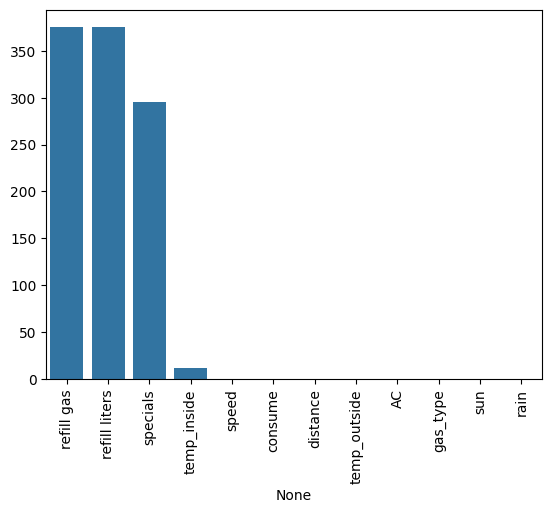

In [7]:
null_values = df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(x = null_values.index,y=null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Data Cleaning

In [8]:
df_encoded = pd.get_dummies(df[['refill gas', 'refill liters', 'specials', 'gas_type']], drop_first=True)
df_encoded['consume'] = df['consume']

In [9]:
correlation_matrix = df_encoded.corr()

# Extract the correlation with the 'consume' column
correlation_with_consume = correlation_matrix['consume']
print(correlation_with_consume)

refill liters                  0.100868
refill gas_SP98               -0.079080
specials_AC Sun               -0.005536
specials_AC rain               0.086100
specials_AC snow               0.107772
specials_AC sun               -0.005536
specials_ac                   -0.031621
specials_ac rain               0.009243
specials_half rain half sun   -0.010462
specials_rain                  0.157122
specials_snow                  0.021755
specials_sun                  -0.168194
specials_sun ac               -0.040982
gas_type_SP98                 -0.015327
consume                        1.000000
Name: consume, dtype: float64


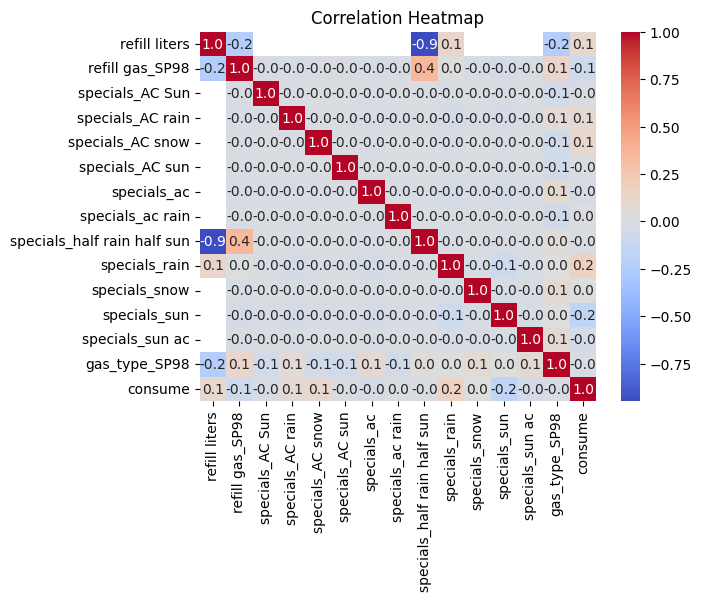

In [10]:
#Heatmap for better visiualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

# **Correlation indicates the strength and direction of a relationship between two variables.**
#1. Positive Correlation Value: Between 0 and +1. Interpretation: As one variable increases, the other variable also increases. The closer the value is to +1, the stronger the positive relationship.

#2. Negative Correlation Value: Between -1 and 0. Interpretation: As one variable increases, the other decreases. The closer the value is to -1, the stronger the negative relationship.

#3. No Correlation Value: Close to 0. Interpretation: There is no linear relationship between the two variables. One variable does not predict the other.

<Axes: >

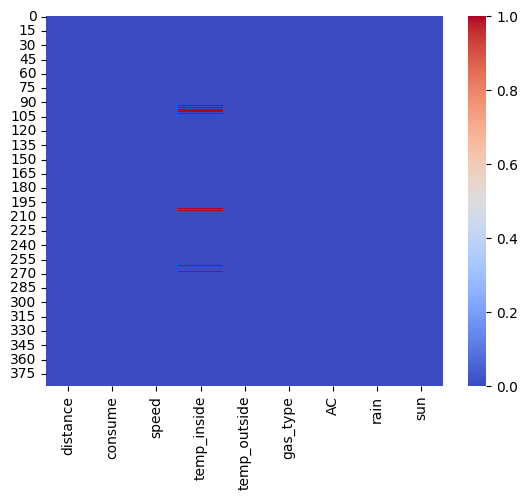

In [11]:
#Since there is no corelation between 'refill gas', 'refill liters', 'specials' and 'consume' removing them from dataset

df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull(), cmap='coolwarm')

In [12]:
temp_inside_mean=np.mean(df['temp_inside'])
print(temp_inside_mean)

21.929521276595743


In [13]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

<Axes: >

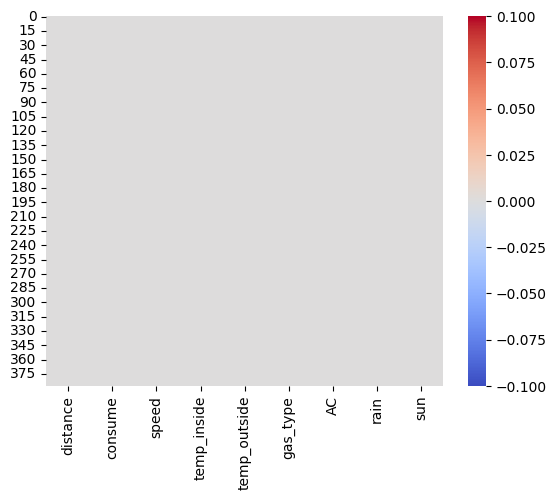

In [14]:
sns.heatmap(df.isnull(), cmap='coolwarm')

# **Data Visualization**

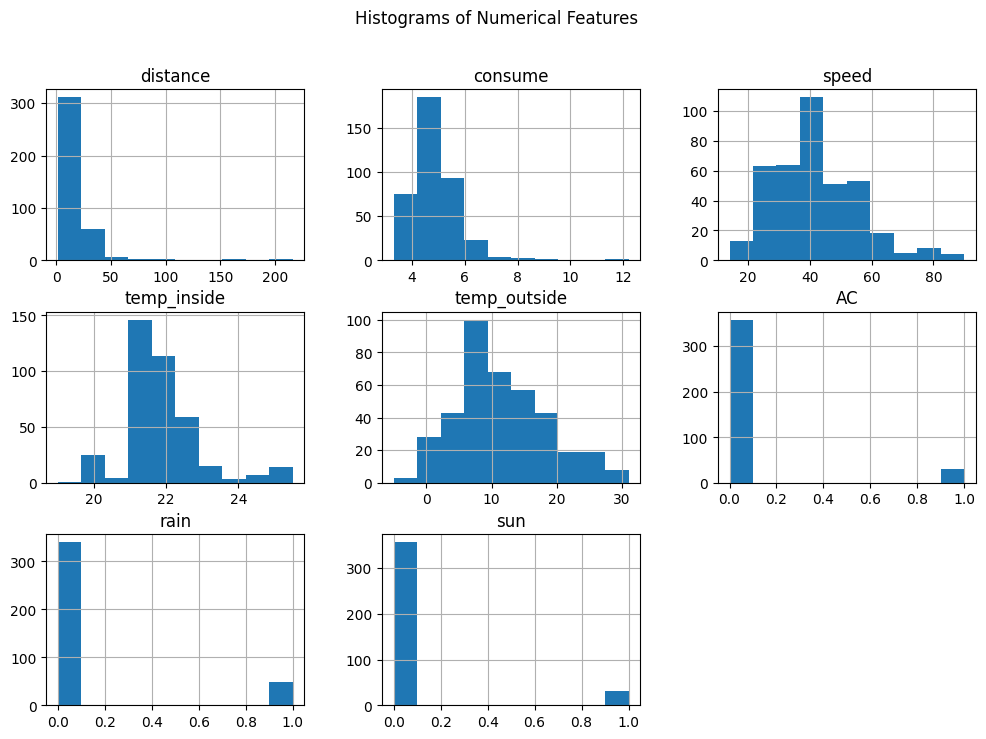

In [15]:
# Histogram for numerical features
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

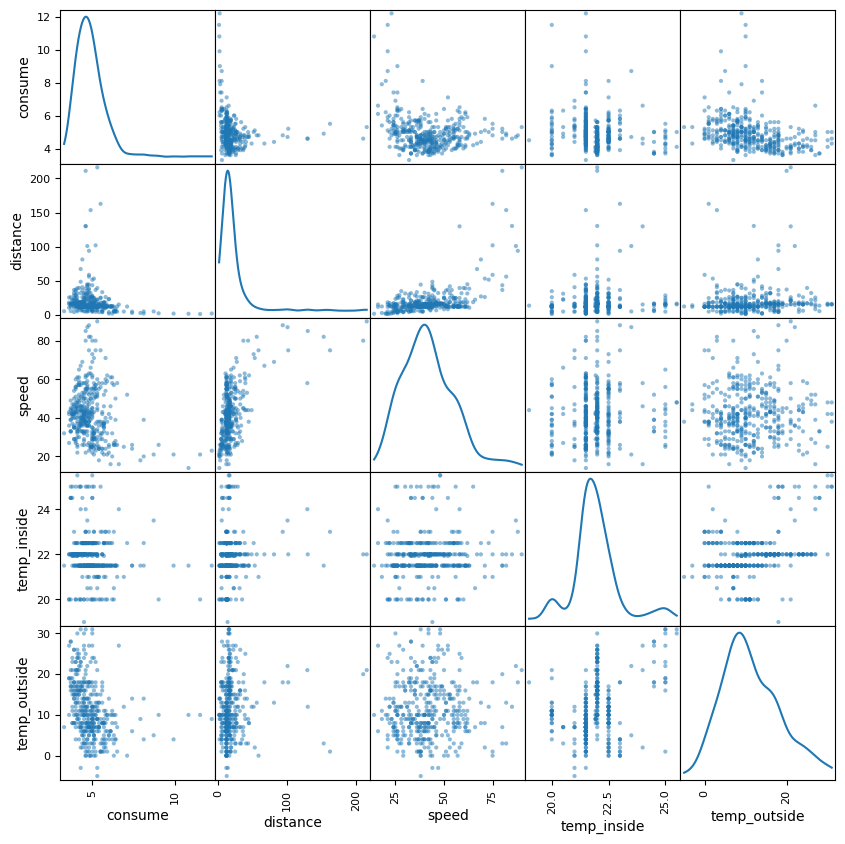

In [16]:
df_scatter = df.loc[:,["consume", "distance", "speed", "temp_inside", "temp_outside"]]
pd.plotting.scatter_matrix(df_scatter, diagonal="kde", figsize=(10.0, 10.0))
plt.show()

<Axes: title={'center': 'consume'}, xlabel='[gas_type]'>

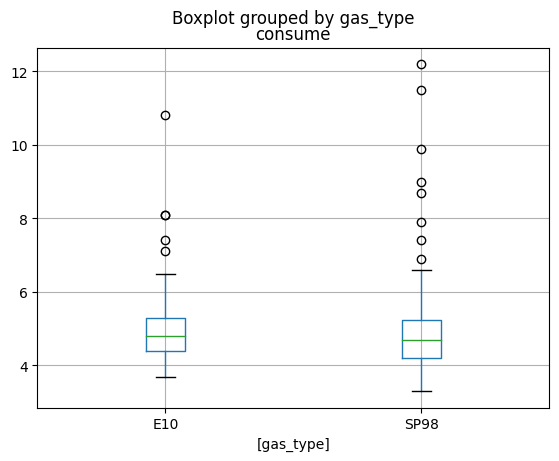

In [17]:
# gas_type
df[["consume", "gas_type"]].boxplot(by="gas_type")

In [18]:
# # Indicates no significant relationship between gas_type and consume

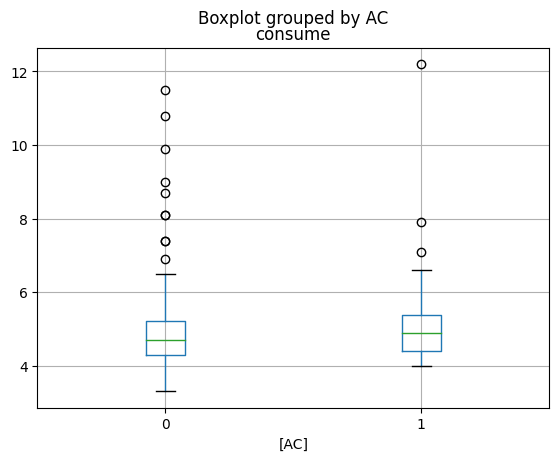

In [19]:
# AC
df[["consume", "AC"]].boxplot(by="AC")
plt.show()

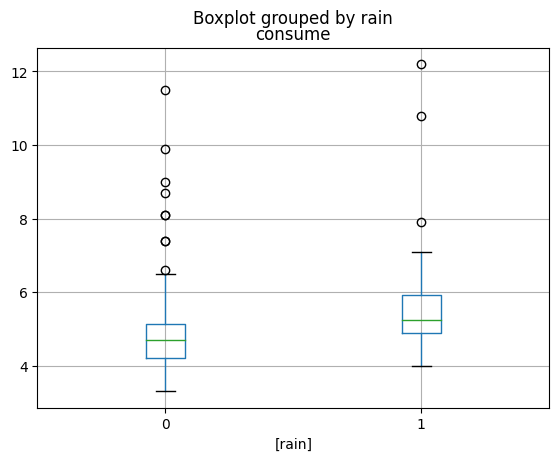

In [20]:
# rain
df[["consume", "rain"]].boxplot(by="rain")
plt.show()

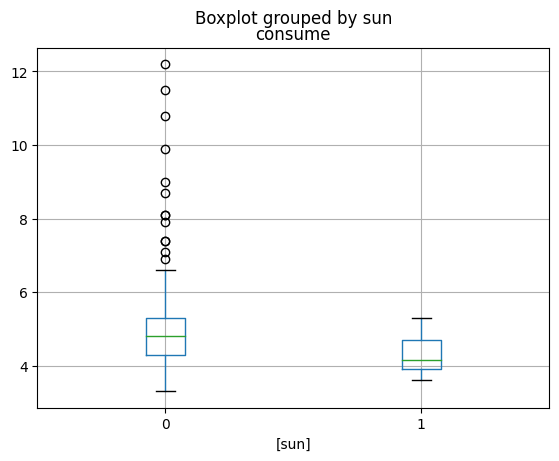

In [21]:
# sun
df[["consume", "sun"]].boxplot(by="sun")
plt.show()

In [359]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# Remove outliers from the relevant columns
data_cleaned = remove_outliers(df[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun']])

# Handle missing values: Drop rows with any NaN values or fill them with a method of your choice
data_cleaned = data_cleaned.dropna()

# **Model Building**

In [360]:
X = data_cleaned[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun']]
y = data_cleaned['consume']

In [361]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# **Scalling**

In [362]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [315]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [382]:
model = Sequential()

model.add(Dense(128, activation='relu',input_dim=7))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [383]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [384]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [385]:
history = model.fit(X_trained_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - loss: 23.4355 - val_loss: 21.4665
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.8837 - val_loss: 18.7924
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.7618 - val_loss: 16.1633
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9241 - val_loss: 13.2030
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.6399 - val_loss: 9.9070
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0418 - val_loss: 6.6001
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7675 - val_loss: 3.7662
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7055 - val_loss: 2.0906
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8141 - val_loss: 1.8636
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8923 - val_loss: 2.2695
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0533 - val_loss: 2.2570
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2136 - val_los

In [386]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [389]:
print(mean_squared_error(y_test,y_pred))

0.4575888151828203


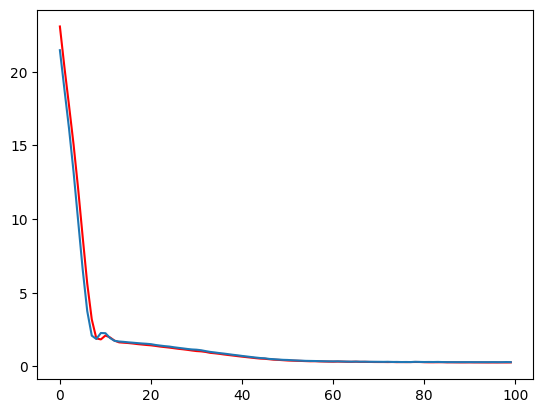

In [388]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'])